In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing MNIST Data from Keras

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

### display image with matplotlib
- Number 5
- keep in mind that the MNIST data set is grey scale

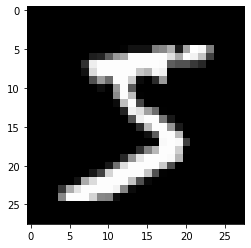

In [7]:
plt.imshow(single_image, cmap="gray")

### exploring the labels

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

### there are 60,000 categories
- we need to transform each category to a one hot encoding/dummy value
- This assigns each value a binary class

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_cat_train = to_categorical(y_train)

In [14]:
y_cat_test = to_categorical(y_test)

### need to normalize the data 
- to make sure you do not run in to any gradient problems the traning data should be scaled between 0 and 1
- normally we will fit_transforming on the trainig data and transform on the test data to make sure we are no assumpton on the test data. This is images and we can make the assumptions that the future images will be scaled as normal/same size
- easy way is just to divide by the max value x_train = x_train/255

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

### Data processing
- Will need to reshape the data
- right now our data is 6000,28,28 _ we need to add one more demension to let the network know we are dealing with a singel rgb channel -> black and white -> 0 to 1

In [17]:
x_train = x_train.reshape(60000, 28,28,1)

In [18]:
## batch size, width, height, color channel
x_train.shape

(60000, 28, 28, 1)

In [19]:
x_test = x_test.reshape(10000,28,28,1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

### Training and creating the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [22]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1)
                 , padding = "valid", input_shape = (28,28,1), activation ="relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimization = "adam", metrics = ["accuracy"])

### Earling Stopping
- So we do not have to worry about the number of epocs

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=1)

In [25]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data=(x_test,y_cat_test), callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1495 - accuracy: 0.9547 - val_loss: 0.0452 - val_accuracy: 0.9849
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0451 - val_accuracy: 0.9856
Epoch 3/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0385 - val_accuracy: 0.9868
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0464 - val_accuracy: 0.9857


In [28]:
model_performance = pd.DataFrame(model.history.history)

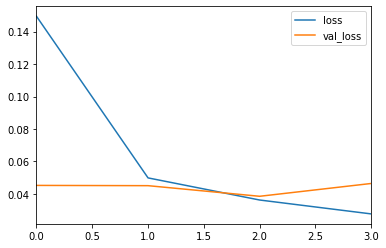

In [30]:
model_performance[["loss", "val_loss"]].plot()

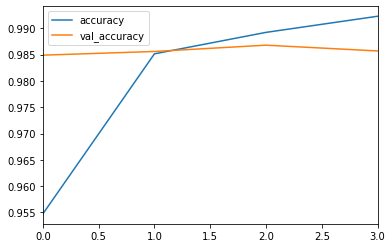

In [32]:
model_performance[["accuracy", "val_accuracy"]].plot()